## Import Libraries

In [1]:
import numpy as numpy
import pandas as pd

import matplotlib as mpl
import matplotlib.pyplot as plt
%matplotlib inline

## Fetching Data

In [2]:
URL = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DV0101EN-SkillsNetwork/Data%20Files/Canada.csv"
df_can = pd.read_csv(URL)

In [3]:
df_can.head()

,Country,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
0,Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
1,Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,...,1223,856,702,560,716,561,539,620,603,15699
2,Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
3,American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
4,Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,...,0,1,1,0,0,0,0,1,1,15


In [4]:
df_can.set_index("Country", inplace=True)
df_can.head()

,Continent,Region,DevName,1980,1981,1982,1983,1984,1985,1986,...,2005,2006,2007,2008,2009,2010,2011,2012,2013,Total
Country,,,,,,,,,,,,,,,,,,,,,
Afghanistan,Asia,Southern Asia,Developing regions,16,39,39,47,71,340,496,...,3436,3009,2652,2111,1746,1758,2203,2635,2004,58639
Albania,Europe,Southern Europe,Developed regions,1,0,0,0,0,0,1,...,1223,856,702,560,716,561,539,620,603,15699
Algeria,Africa,Northern Africa,Developing regions,80,67,71,69,63,44,69,...,3626,4807,3623,4005,5393,4752,4325,3774,4331,69439
American Samoa,Oceania,Polynesia,Developing regions,0,1,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,6
Andorra,Europe,Southern Europe,Developed regions,0,0,0,0,0,0,2,...,0,1,1,0,0,0,0,1,1,15


## Line Plot

In [9]:
years = list(map(str, range(1980, 2014)))
df_line = df_can[years]
total_immigrants = df_line.sum()
total_immigrants.index = total_immigrants.index.map(int)

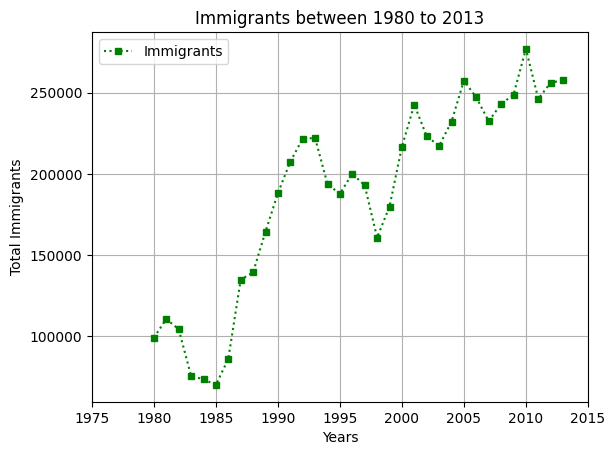

In [13]:
# create figure and axes
fig, ax = plt.subplots()

# plot the line
ax.plot(total_immigrants, marker="s", markersize=5, color="green", linestyle="dotted")
ax.set_title("Immigrants between 1980 to 2013")
ax.set_xlabel("Years")
ax.set_ylabel("Total Immigrants")
plt.xlim(1975, 2015)
plt.grid(True)
ax.legend(["Immigrants"])
plt.show()

### Plot a line graph of immigration from Haiti

In [18]:
df_haiti = df_can.loc[["Haiti"], years]
df_haiti = df_haiti.transpose()
df_haiti.index = df_haiti.index.map(int)
df_haiti.head()

Country,Haiti
1980,1666
1981,3692
1982,3498
1983,2860
1984,1418


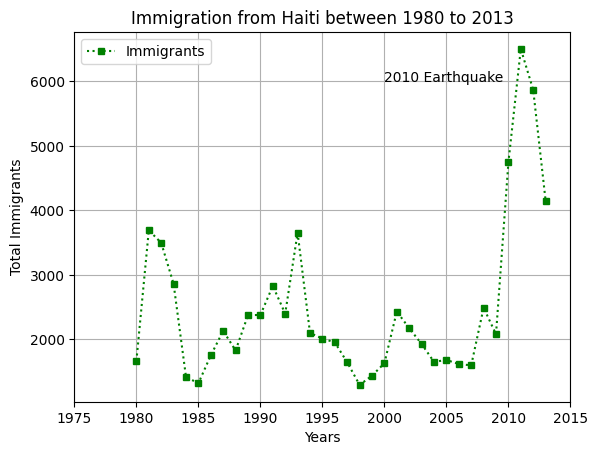

In [21]:
# create figure and axes
fig, ax = plt.subplots()

# plot the line
ax.plot(df_haiti, marker="s", markersize=5, color="green", linestyle="dotted")
ax.set_title("Immigration from Haiti between 1980 to 2013")
ax.set_xlabel("Years")
ax.set_ylabel("Total Immigrants")
plt.xlim(1975, 2015)
plt.grid(True)
ax.legend(["Immigrants"])
ax.annotate("2010 Earthquake", xy=(2000, 6000))
plt.show()

## Scatter Plot

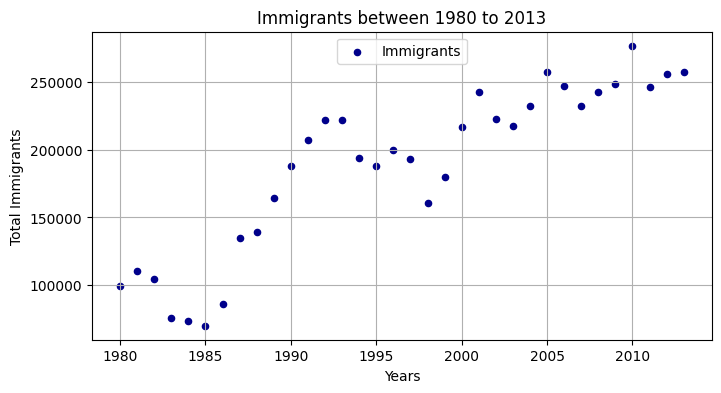

In [23]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(8, 4))

total_immigrants.index = total_immigrants.index.map(int)

# Customizing Scatter Plot
ax.scatter(
    total_immigrants.index,
    total_immigrants,
    marker="o",  # setting up the markers
    s=20,  # setting up the size of the markers
    color="darkblue",
)  # the color for the marker

# add title
plt.title("Immigrants between 1980 to 2013")
# add labels
plt.xlabel("Years")
plt.ylabel("Total Immigrants")
# including grid
plt.grid(True)

# Legend at upper center of the figure
ax.legend(["Immigrants"], loc="upper center")

# Display the plot
plt.show()

## Bar Plot

In [24]:
df_can.sort_values(by=["Total"], ascending=False, axis=0, inplace=True)
df_top5 = df_can.head(5)
df_bar_top5 = df_top5.reset_index()
label = list(df_bar_top5["Country"])
label

['India',
 'China',
 'United Kingdom of Great Britain and Northern Ireland',
 'Philippines',
 'Pakistan']

In [25]:
label[2] = "UK"
label

['India', 'China', 'UK', 'Philippines', 'Pakistan']

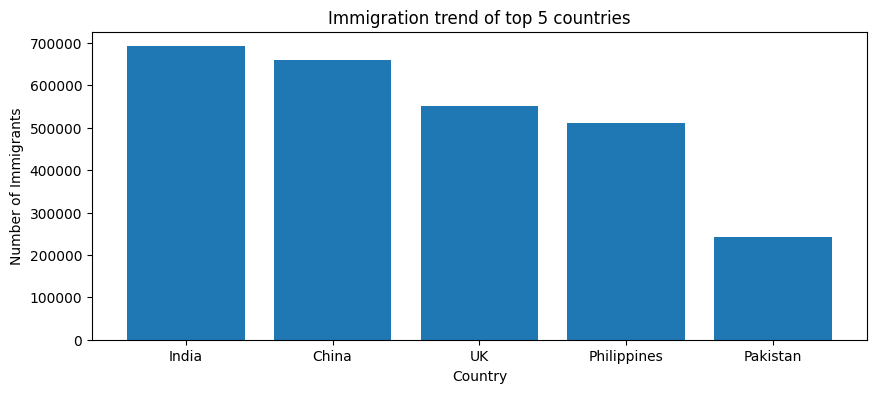

In [27]:
fig, ax = plt.subplots(figsize=(10, 4))

ax.bar(label, df_bar_top5["Total"], label=label)
ax.set_title("Immigration trend of top 5 countries")
ax.set_xlabel("Country")
ax.set_ylabel("Number of Immigrants")
plt.show()

## Histogram

In [28]:
# Frequency distribution of #new immigrants from various countries to Canada in 2013
df_country = df_can.groupby(by=["Country"])["2013"].sum().reset_index()

df_country.head()

,Country,2013
0,Afghanistan,2004
1,Albania,603
2,Algeria,4331
3,American Samoa,0
4,Andorra,1


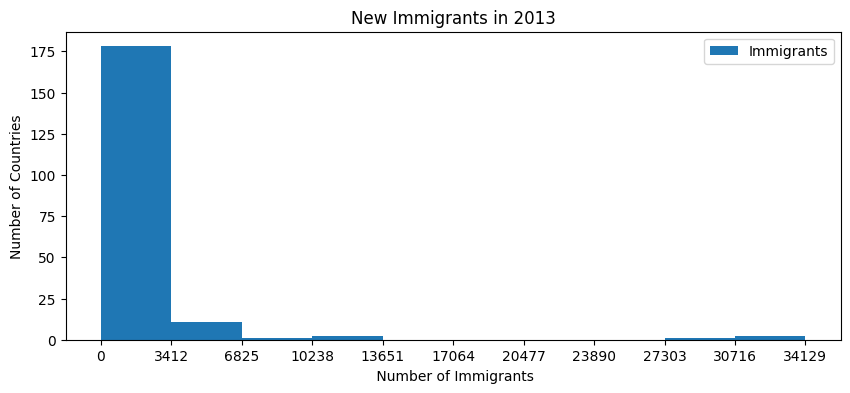

In [42]:
fig, ax = plt.subplots(figsize=(10, 4))
count = ax.hist(df_country["2013"])
ax.set_title("New Immigrants in 2013")
ax.set_xlabel(" Number of Immigrants")
ax.set_ylabel("Number of Countries")
ax.set_xticks(list(map(int, count[1])))
ax.legend(["Immigrants"])
plt.show()

### Plot multiple histograms on the same plot

In [44]:
# let's quickly view the dataset
df = df_can.groupby(["Country"])[years].sum()
df_dns = df.loc[["Denmark", "Norway", "Sweden"], years]
df_dns = df_dns.transpose()
df_dns.head()

Country,Denmark,Norway,Sweden
1980,272,116,281
1981,293,77,308
1982,299,106,222
1983,106,51,176
1984,93,31,128


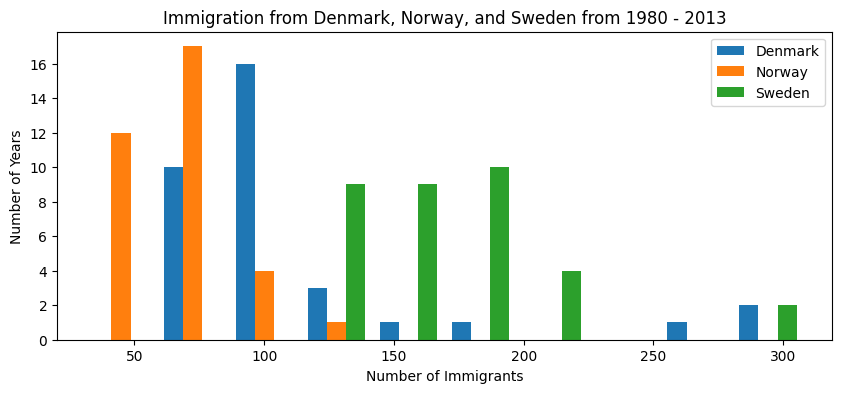

In [45]:
# Create figure and axes
fig, ax = plt.subplots(figsize=(10, 4))
ax.hist(df_dns)
ax.set_title("Immigration from Denmark, Norway, and Sweden from 1980 - 2013")
ax.set_xlabel("Number of Immigrants")
ax.set_ylabel("Number of Years")
ax.legend(["Denmark", "Norway", "Sweden"])
# Display the plot
plt.show()

## Pie Chart

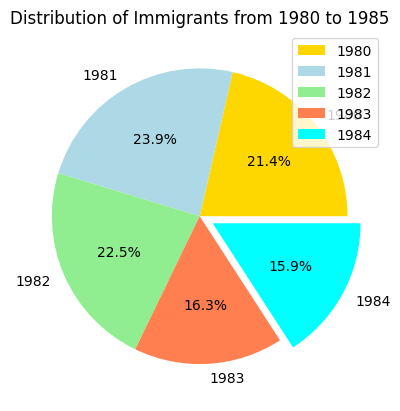

In [49]:
fig, ax = plt.subplots()
ax.pie(
    total_immigrants[0:5],
    labels=years[0:5],
    colors=["gold", "lightblue", "lightgreen", "coral", "cyan"],
    autopct="%1.1f%%",
    explode=[0, 0, 0, 0, 0.1],
)
ax.set_aspect("equal")
plt.title("Distribution of Immigrants from 1980 to 1985")
plt.legend(years[0:5])
plt.show()

### Create a pie chart representing the total immigrants proportion for each continent

In [54]:
# Creating data for plotting pie
df_con = df_can.groupby("Continent")["Total"].sum().reset_index()
label = list(df_con.Continent)
label[3] = "LAC"
label[4] = "NA"
df_con

,Continent,Total
0,Africa,618948
1,Asia,3317794
2,Europe,1410947
3,Latin America and the Caribbean,765148
4,Northern America,241142
5,Oceania,55174


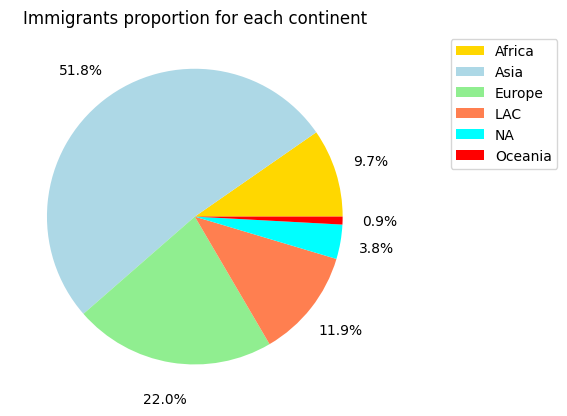

In [61]:
fig, ax = plt.subplots()
ax.pie(
    df_con["Total"],
    colors=["gold", "lightblue", "lightgreen", "coral", "cyan", "red"],
    autopct="%1.1f%%",
    pctdistance=1.25,
)
ax.set_aspect("equal")
plt.title("Immigrants proportion for each continent")
plt.legend(label, bbox_to_anchor=(1, 0, 0.5, 1))
plt.show()

## Sub-plotting

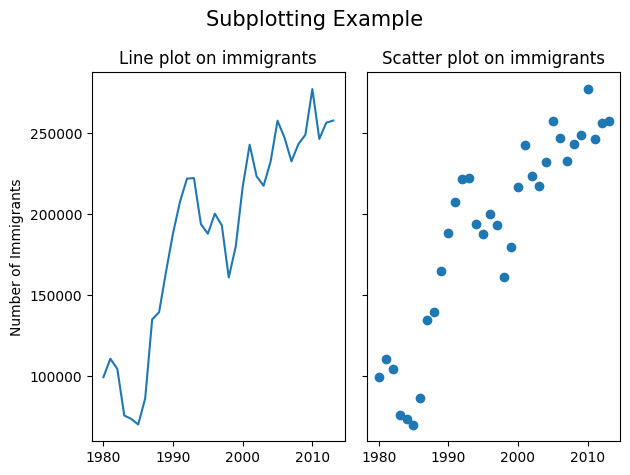

In [62]:
# Create a figure with two axes in a row

fig, axs = plt.subplots(1, 2, sharey=True)

# Plotting in first axes - the left one
axs[0].plot(total_immigrants)
axs[0].set_title("Line plot on immigrants")

# Plotting in second axes - the right one
axs[1].scatter(total_immigrants.index, total_immigrants)
axs[1].set_title("Scatter plot on immigrants")

axs[0].set_ylabel("Number of Immigrants")

# Adding a Title for the Overall Figure
fig.suptitle("Subplotting Example", fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

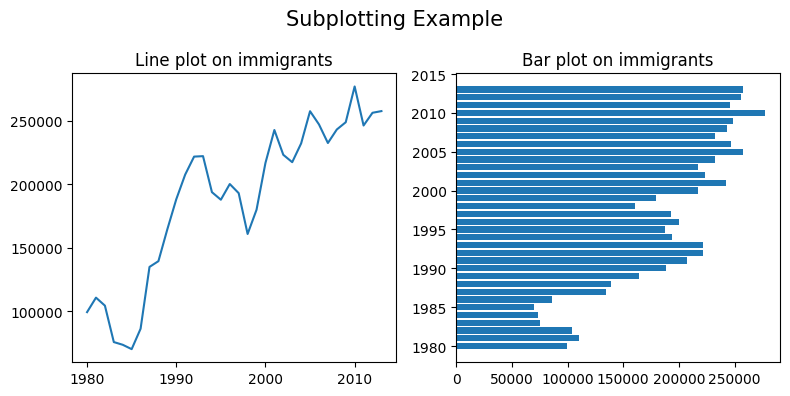

In [63]:
# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(8, 4))

# Add the first subplot (top-left)
axs1 = fig.add_subplot(1, 2, 1)
# Plotting in first axes - the left one
axs1.plot(total_immigrants)
axs1.set_title("Line plot on immigrants")

# Add the second subplot (top-right)
axs2 = fig.add_subplot(1, 2, 2)
# Plotting in second axes - the right one
axs2.barh(
    total_immigrants.index, total_immigrants
)  # Notice the use of 'barh' for creating horizontal bar plot
axs2.set_title("Bar plot on immigrants")

# Adding a Title for the Overall Figure
fig.suptitle("Subplotting Example", fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()

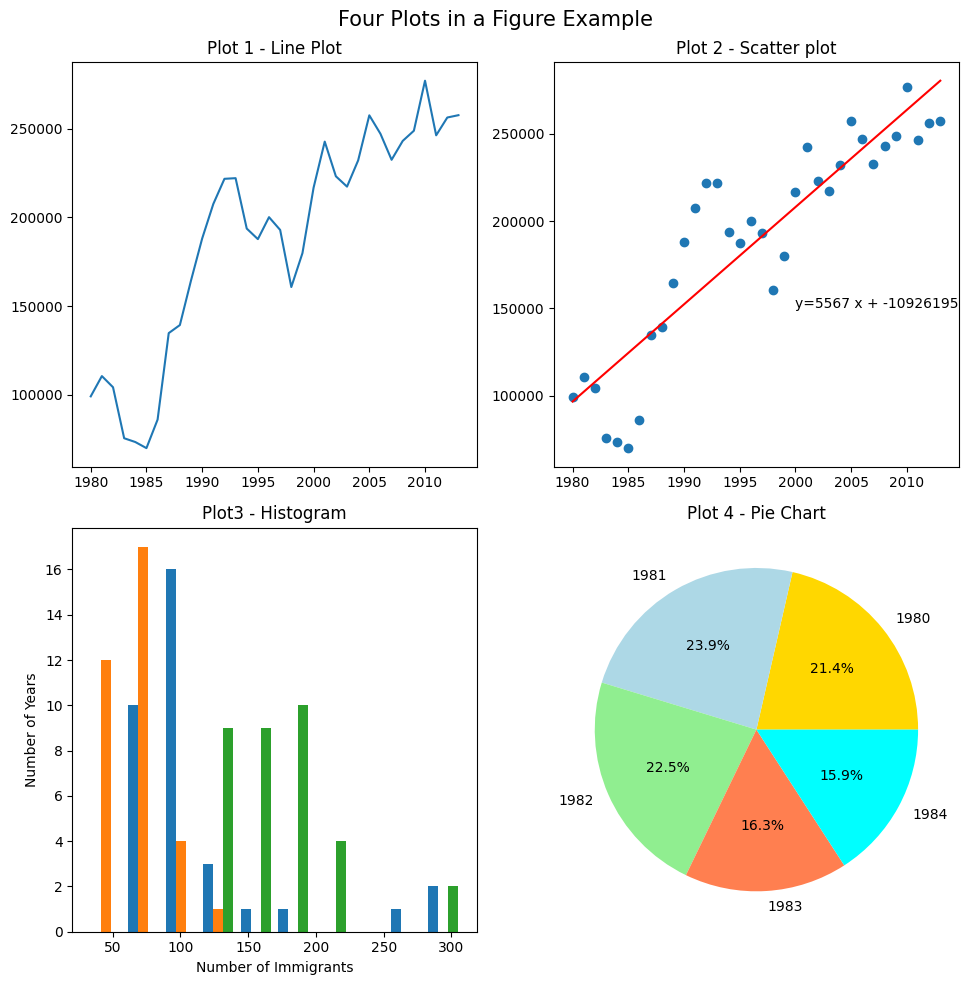

In [78]:
import numpy as np


# Create a figure with Four axes - two rows, two columns
fig = plt.figure(figsize=(10, 10))

# Add the first subplot (top-left)
ax1 = fig.add_subplot(2, 2, 1)
ax1.plot(total_immigrants)
ax1.set_title("Plot 1 - Line Plot")

# Add the second subplot (top-right)
ax2 = fig.add_subplot(2, 2, 2)
ax2.scatter(total_immigrants.index, total_immigrants)
ax2.set_title("Plot 2 - Scatter plot")

x = total_immigrants.index
y = total_immigrants
fit = np.polyfit(x, y, deg=1)
# plot line of best fit
plt.plot(x, fit[0] * x + fit[1], color="red")  # recall that x is the Years
plt.annotate("y={0:.0f} x + {1:.0f}".format(fit[0], fit[1]), xy=(2000, 150000))


# Add the third subplot (bottom-left)
ax3 = fig.add_subplot(2, 2, 3)
ax3.hist(df_dns)
ax3.set_title("Plot3 - Histogram")
ax3.set_xlabel("Number of Immigrants")
ax3.set_ylabel("Number of Years")

# Add the fourth subplot (bottom-right)
ax4 = fig.add_subplot(2, 2, 4)
ax4.pie(
    total_immigrants[0:5],
    labels=years[0:5],
    colors=["gold", "lightblue", "lightgreen", "coral", "cyan"],
    autopct="%1.1f%%",
)
ax4.set_aspect("equal")
ax4.set_title("Plot 4 - Pie Chart")

# Adding a Title for the Overall Figure
fig.suptitle("Four Plots in a Figure Example", fontsize=15)

# Adjust spacing between subplots
fig.tight_layout()


# Show the figure
plt.show()